# Arboles de decisión

In [1]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

In [2]:
def cargarDatos():
    '''Se procede a cargar los datos del dataset prestamos.csv
           Retornos:
           df: Almacena las tablas del dataset prestamos.csv
   '''
    df = pandas.read_csv('prestamos.csv')
    return df
print(cargarDatos.__doc__)

Se procede a cargar los datos del dataset prestamos.csv
           Retornos:
           df: Almacena las tablas del dataset prestamos.csv
   


In [3]:
def encodeSN(df):
    '''Se procede a cargar los datos del dataset prestamos.csv, encodeSN es la binarizacion para el Si o No que sea 1 o 0
           Parametros:
           df: Almacena las tablas del dataset prestamos.csv
   '''
    d1 = {'SI': 1 , 'NO': 0}
    df[' Aprobar Credito'] = df[' Aprobar Credito'].map(d1)
print(encodeSN.__doc__)

Se procede a cargar los datos del dataset prestamos.csv, encodeSN es la binarizacion para el Si o No que sea 1 o 0
           Parametros:
           df: Almacena las tablas del dataset prestamos.csv
   


In [4]:
def tomarCaracteristicas(df):
    '''Se procede a elegir características, es decir, columnas de las que intentamos predecir.
       Finalmente se elege el objetivo, es decir, la columna con los valores que intentamos predecir
       Parametros:
       df: Almacena las tablas del dataset prestamos.csv
       Retornos:
       features(Array): Características del modelo.
       X(Array): Contiene las x del modelo para aprobar crédito.
       y(Array): Contiene las y del modelo para aprobar crédito.
       '''
    features = ['Edad', 'GradoAcademico','Sueldo', 'Años de Trabajo']
    X = df[features]
    y = df[' Aprobar Credito']
    return features, X, y
print(tomarCaracteristicas.__doc__)

Se procede a elegir características, es decir, columnas de las que intentamos predecir.
       Finalmente se elege el objetivo, es decir, la columna con los valores que intentamos predecir
       Parametros:
       df: Almacena las tablas del dataset prestamos.csv
       Retornos:
       features(Array): Características del modelo.
       X(Array): Contiene las x del modelo para aprobar crédito.
       y(Array): Contiene las y del modelo para aprobar crédito.
       


In [5]:
def dividirEntrenamientoTest(df):
    '''Se divide el test de entrenamiento.
       Parametros:
       df: Almacena las tablas del dataset prestamos.csv
       Retornos:
       X_train(array): Contiene las X de entrenamiento. 
       X_test(array): Contiene las X de testeo.
       y_train(array): Contiene las Y de entrenamiento.
       y_test(array): Contiene las Y de testeo.
       '''
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:4], df.iloc[:,-1], test_size = 0.3)
    return  X_train, X_test, y_train, y_test
print(dividirEntrenamientoTest.__doc__)

Se divide el test de entrenamiento.
       Parametros:
       df: Almacena las tablas del dataset prestamos.csv
       Retornos:
       X_train(array): Contiene las X de entrenamiento. 
       X_test(array): Contiene las X de testeo.
       y_train(array): Contiene las Y de entrenamiento.
       y_test(array): Contiene las Y de testeo.
       


In [6]:
def enrtenarModelo(X_test, X_train, y_train):
    '''Se procede a crear un árbol de decisiones.
       Parametros:
       X_test(array): Contiene las x de entrenamiento.
       X_train(array): Contiene las X de entrenamiento.
       y_train(array): Contiene las Y de entrenamiento.
       Retornos:
       y_pred(array): Contiene las Y de predicción.
       dtree (Array): Contiene el arbol de decision.
       '''
    dtree = DecisionTreeClassifier()
    dtree = dtree.fit(X_train, y_train)
    y_pred = dtree.predict(X_test)
    return y_pred, dtree
print(enrtenarModelo.__doc__)

Se procede a crear un árbol de decisiones.
       Parametros:
       X_test(array): Contiene las x de entrenamiento.
       X_train(array): Contiene las X de entrenamiento.
       y_train(array): Contiene las Y de entrenamiento.
       Retornos:
       y_pred(array): Contiene las Y de predicción.
       dtree (Array): Contiene el arbol de decision.
       


In [7]:
def matrizConfusion(y_test, y_pred, dtree):
    '''Se procede a crear la matriz de confusión.
       Parametros:
       y_test(array): Contiene las Y de testeo.
       y_pred(array): Contiene las Y de predicción.
       dtree(array): Contiene el arbol de decision.
       '''
    cm = confusion_matrix(y_test, y_pred, labels=dtree.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtree.classes_)
    disp.plot()
    plt.show()
print(matrizConfusion.__doc__)

Se procede a crear la matriz de confusión.
       Parametros:
       y_test(array): Contiene las Y de testeo.
       y_pred(array): Contiene las Y de predicción.
       dtree(array): Contiene el arbol de decision.
       


In [8]:
def evaluarModelo(y_test, y_pred):
    '''Se evalua el modelo. Se calcula las metricas de Accuracy, Precision y Recall.
       Parametros:
       y_test(array): Contiene las Y de testeo.
       y_pred(array): Contiene las Y de predicción.
       '''
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))
print(evaluarModelo.__doc__)

Se evalua el modelo. Se calcula las metricas de Accuracy, Precision y Recall.
       Parametros:
       y_test(array): Contiene las Y de testeo.
       y_pred(array): Contiene las Y de predicción.
       


In [9]:
def graficarArbol(dtree, features):
    '''Se guarda el árbol de decisiones como una imagen y se muestra la imagen.
       Parametros:
       dtree(array): Contiene el arbol de decision.
      features(Array): Características del modelo.
       '''
    data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
    graph = pydotplus.graph_from_dot_data(data)
    graph.write_png('mydecisiontree.png')

    img = pltimg.imread('mydecisiontree.png')
    imgplot = plt.imshow(img)
    plt.show()
print(graficarArbol.__doc__)

Se guarda el árbol de decisiones como una imagen y se muestra la imagen.
       Parametros:
       dtree(array): Contiene el arbol de decision.
      features(Array): Características del modelo.
       


In [10]:
def main ():
    '''Se cargan los datos en df para aplicar encordeSN y definir el Si o No que sea 1 o 0.
    Finalmente se realiza la matriz de confusión, la evaluación del modelo y la graficación del arbol.
    El objetivo del main() es realizar varios procesos llamando a una sola función'''
    df = cargarDatos()
    encodeSN(df)
    print (df)
    features, X, y = tomarCaracteristicas(df)
    X_train, X_test, y_train, y_test = dividirEntrenamientoTest(df)
    y_pred, dtree = enrtenarModelo(X_test, X_train, y_train)
    matrizConfusion(y_test, y_pred, dtree)
    evaluarModelo(y_test, y_pred)
    graficarArbol(dtree, features)
print(main.__doc__)

Se cargan los datos en df para aplicar encordeSN y definir el Si o No que sea 1 o 0.
    Finalmente se realiza la matriz de confusión, la evaluación del modelo y la graficación del arbol.
    El objetivo del main() es realizar varios procesos llamando a una sola función


    Edad  GradoAcademico  Sueldo  Años de Trabajo   Aprobar Credito
0     20               3    1000                1                 1
1     26               4    1500                2                 0
2     25               2    1200                6                 1
3     52               1     400                1                 0
4     60               1     425                1                 0
5     34               3    1000               10                 1
6     62               1     600                0                 0
7     33               5    1100                3                 1
8     32               4    1200                8                 1
9     54               1     500                1                 0
10    24               4    1300               11                 0
11    18               2    1100               12                 0
12    30               5    2000               33                 1


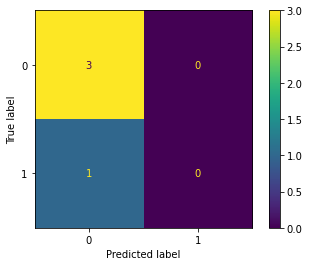

Accuracy: 0.75
Precision: 0.0
Recall: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


InvocationException: GraphViz's executables not found

In [11]:
main()